INF2178 A1

Mingrui Fu

1010506551


In [ ]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


step 1: import libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_excel("/drive/My Drive/2178/INF2178_A1_data.xlsx",sheet_name='data')
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


step 2: initial exploration

In [ ]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

step 3: select relevant columns and explore data

In [ ]:
selected_columns = ['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
df_selected = df[selected_columns]
df_selected.head(30)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
5,Bed Based Capacity,Emergency,6,8.0,6.0,NaN,NaN
6,Room Based Capacity,Emergency,120,NaN,NaN,46.0,44.0
7,Room Based Capacity,Emergency,130,NaN,NaN,46.0,44.0
8,Room Based Capacity,Emergency,153,NaN,NaN,145.0,145.0
9,Room Based Capacity,Emergency,40,NaN,NaN,41.0,40.0


In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'SERVICE_USER_COUNT'
service_user_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(service_user_stats_by_model)

               min  max       mean  median        std
PROGRAM_MODEL                                        
Emergency        1  339  49.064226    33.0  55.916561
Transitional     1  221  30.988725    23.0  36.431741


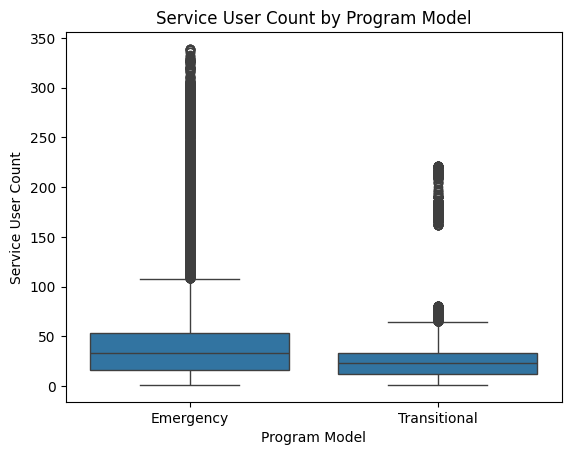

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df_selected)
plt.title('Service User Count by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()

In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'SERVICE_USER_COUNT'
service_user_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['SERVICE_USER_COUNT'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(service_user_stats_by_type)

                     min  max       mean  median        std
CAPACITY_TYPE                                              
Bed Based Capacity     1  234  29.780271    23.0  26.379416
Room Based Capacity    1  339  73.587166    47.0  73.319030


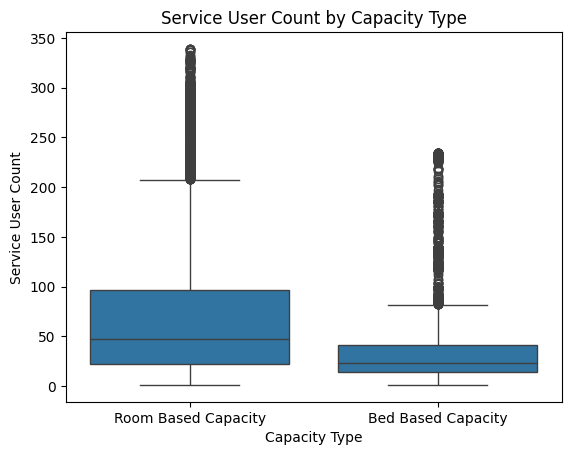

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df_selected)
plt.title('Service User Count by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
plt.show()

In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'CAPACITY_ACTUAL_BED'
capacity_bed_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['CAPACITY_ACTUAL_BED'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(capacity_bed_stats_by_model)

               min    max       mean  median        std
PROGRAM_MODEL                                          
Emergency      1.0  234.0  33.833516    25.0  29.390146
Transitional   2.0   83.0  25.593703    24.0  18.342901


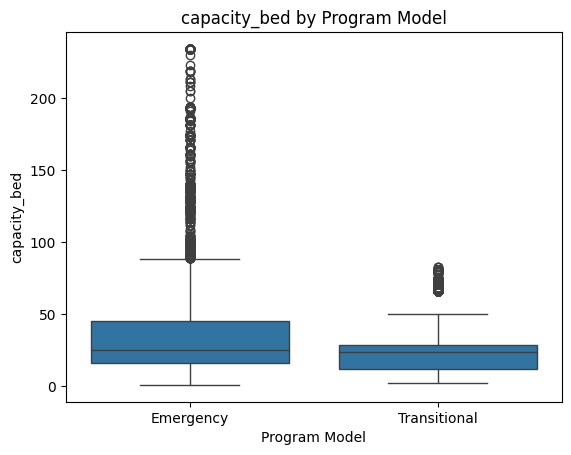

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_ACTUAL_BED', data=df_selected)
plt.title('capacity_bed by Program Model')
plt.xlabel('Program Model')
plt.ylabel('capacity_bed')
plt.show()

In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'CAPACITY_ACTUAL_BED'
capacity_bed_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['CAPACITY_ACTUAL_BED'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(capacity_bed_stats_by_type)

                     min    max       mean  median        std
CAPACITY_TYPE                                                
Bed Based Capacity   1.0  234.0  31.627149    25.0  27.127682
Room Based Capacity  NaN    NaN        NaN     NaN        NaN


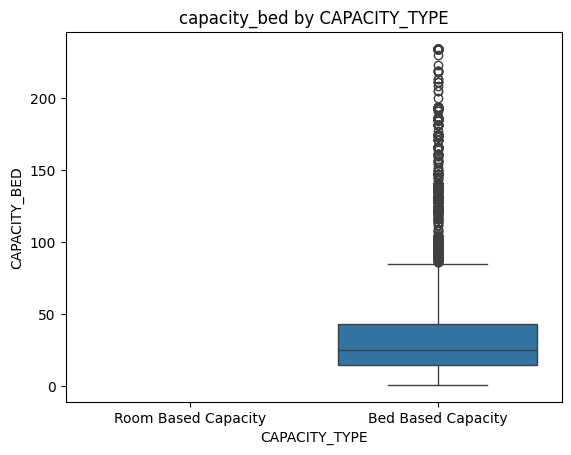

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='CAPACITY_ACTUAL_BED', data=df_selected)
plt.title('capacity_bed by CAPACITY_TYPE')
plt.xlabel('CAPACITY_TYPE')
plt.ylabel('CAPACITY_BED')
plt.show()

In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'OCCUPIED_BEDS'
occupied_bed_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['OCCUPIED_BEDS'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupied_bed_stats_by_model)

               min    max       mean  median        std
PROGRAM_MODEL                                          
Emergency      1.0  234.0  32.182711    25.0  28.573265
Transitional   1.0   80.0  23.210818    21.0  17.526459


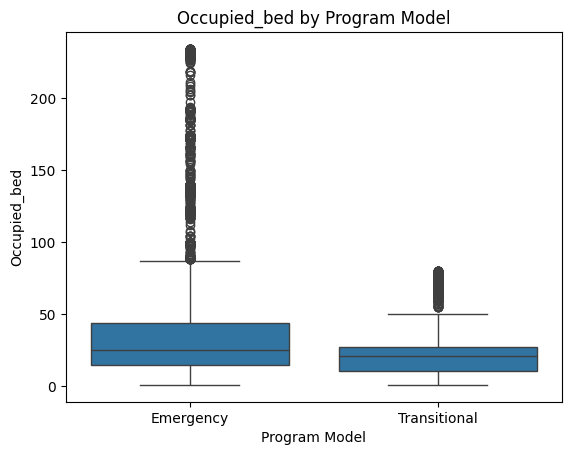

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_BEDS', data=df_selected)
plt.title('Occupied_bed by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupied_bed')
plt.show()

In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'OCCUPIED_BEDS'
occupied_bed_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['OCCUPIED_BEDS'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupied_bed_stats_by_type)

                     min    max       mean  median        std
CAPACITY_TYPE                                                
Bed Based Capacity   1.0  234.0  29.780271    23.0  26.379416
Room Based Capacity  NaN    NaN        NaN     NaN        NaN


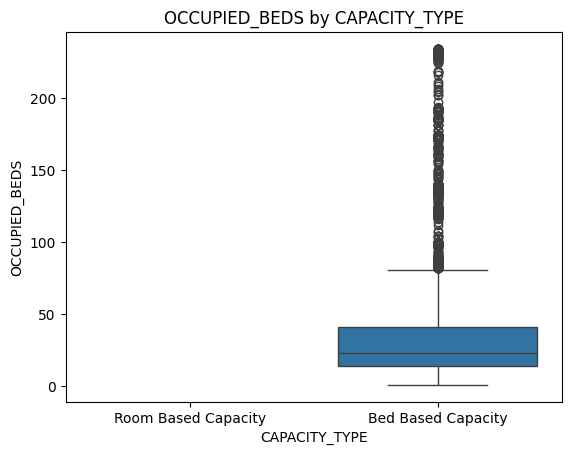

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_BEDS', data=df_selected)
plt.title('OCCUPIED_BEDS by CAPACITY_TYPE')
plt.xlabel('CAPACITY_TYPE')
plt.ylabel('OCCUPIED_BEDS')
plt.show()

In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'CAPACITY_ACTUAL_ROOM'
capacity_room_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['CAPACITY_ACTUAL_ROOM'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(capacity_room_stats_by_model)

                min    max       mean  median        std
PROGRAM_MODEL                                           
Emergency       1.0  268.0  56.010721    35.0  60.503601
Transitional   23.0   63.0  44.287671    42.5  17.748494


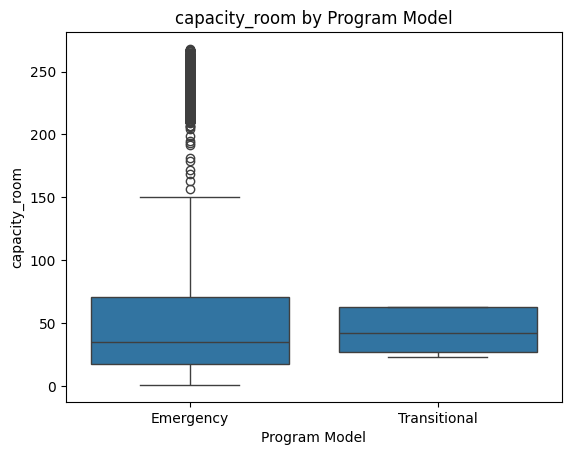

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_ACTUAL_ROOM', data=df_selected)
plt.title('capacity_room by Program Model')
plt.xlabel('Program Model')
plt.ylabel('capacity_room')
plt.show()

In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'CAPACITY_ACTUAL_ROOM'
capacity_room_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['CAPACITY_ACTUAL_ROOM'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(capacity_room_stats_by_type)

                     min    max       mean  median        std
CAPACITY_TYPE                                                
Bed Based Capacity   NaN    NaN        NaN     NaN        NaN
Room Based Capacity  1.0  268.0  55.549259    35.0  59.448805


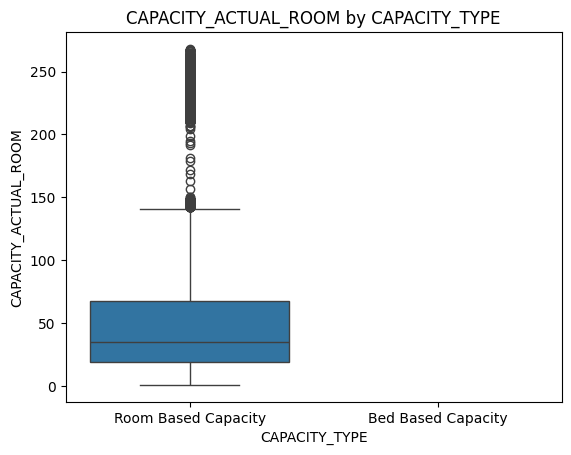

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='CAPACITY_ACTUAL_ROOM', data=df_selected)
plt.title('CAPACITY_ACTUAL_ROOM by CAPACITY_TYPE')
plt.xlabel('CAPACITY_TYPE')
plt.ylabel('CAPACITY_ACTUAL_ROOM')
plt.show()

In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'OCCUPIED_ROOMS'
occupied_room_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['OCCUPIED_ROOMS'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupied_room_stats_by_model)

                min    max       mean  median        std
PROGRAM_MODEL                                           
Emergency       1.0  268.0  53.433679    34.0  59.799883
Transitional   18.0   63.0  37.300000    35.0  17.114931


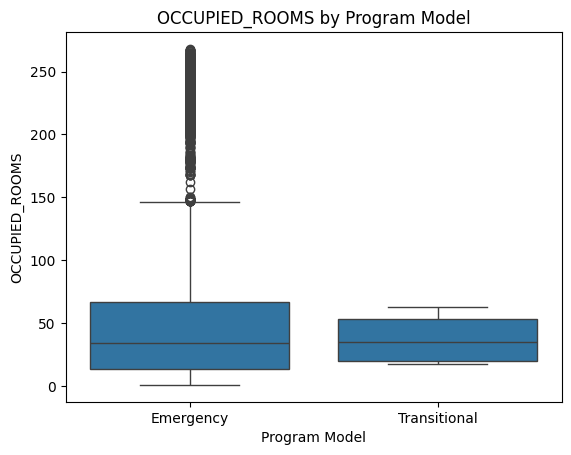

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_ROOMS', data=df_selected)
plt.title('OCCUPIED_ROOMS by Program Model')
plt.xlabel('Program Model')
plt.ylabel('OCCUPIED_ROOMS')
plt.show()

In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'OCCUPIED_ROOMS'
occupied_room_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['OCCUPIED_ROOMS'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupied_room_stats_by_type)

                     min    max       mean  median        std
CAPACITY_TYPE                                                
Bed Based Capacity   NaN    NaN        NaN     NaN        NaN
Room Based Capacity  1.0  268.0  52.798598    34.0  58.792954


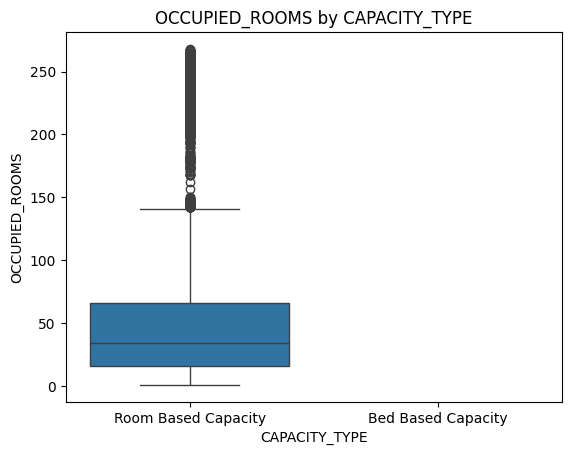

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_ROOMS', data=df_selected)
plt.title('OCCUPIED_ROOMS by CAPACITY_TYPE')
plt.xlabel('CAPACITY_TYPE')
plt.ylabel('OCCUPIED_ROOMS')
plt.show()

In [ ]:
# Create a function to calculate occupancy rates based on capacity type
def calculate_occupancy_rate(row):
    if row['CAPACITY_TYPE'] == 'Bed Based Capacity':
        return row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED']
    elif row['CAPACITY_TYPE'] == 'Room Based Capacity':
        return row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM']
    else:
        return None

# Apply the function to create the "OCCUPANCY_RATE" column
#df_selected['OCCUPANCY_RATE'] = df_selected.apply(calculate_occupancy_rate, axis=1)
df_selected.loc[:, 'OCCUPANCY_RATE'] = df_selected.apply(calculate_occupancy_rate, axis=1)
df_selected.head()

<ipython-input-27-92c4c5b0b550>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'OCCUPANCY_RATE'] = df_selected.apply(calculate_occupancy_rate, axis=1)


,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,0.928571


In [ ]:
# Group by 'CAPACITY_TYPE' and compute statistics for 'Occupancy Rate'
occupancy_rate_stats_by_type = df_selected.groupby('CAPACITY_TYPE')['OCCUPANCY_RATE'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupancy_rate_stats_by_type)

                          min       max      mean  median       std
CAPACITY_TYPE                                                      
Bed Based Capacity   0.022727  1.000000  0.927885     1.0  0.122562
Room Based Capacity  0.012048  1.014085  0.934087     1.0  0.163241


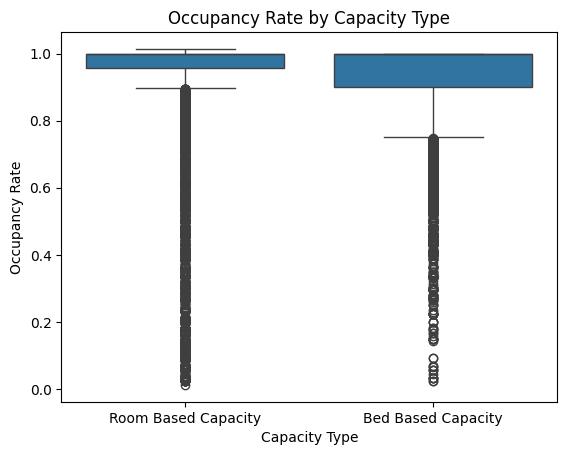

In [ ]:
# Create a boxplot
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Occupancy Rate by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Occupancy Rate')
plt.show()

In [ ]:
# Group by 'PROGRAM_MODEL' and compute statistics for 'Occupancy Rate'
occupancy_rate_stats_by_model = df_selected.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE'].agg(['min', 'max', 'mean', 'median', 'std'])

# Display the computed statistics
print(occupancy_rate_stats_by_model)

                    min       max      mean    median       std
PROGRAM_MODEL                                                  
Emergency      0.012048  1.014085  0.941412  1.000000  0.138558
Transitional   0.222222  1.000000  0.880381  0.918919  0.128472


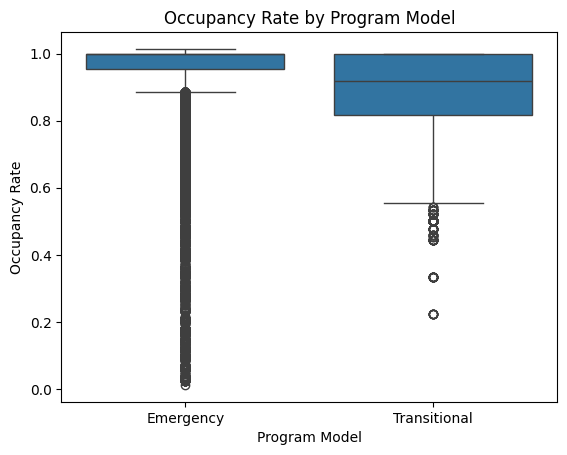

In [ ]:
# Create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate')
plt.show()

step 4: perform T-Tests

In [ ]:
# T-test between SERVICE_USER_COUNT for different PROGRAM_MODEL categories
program_models = df_selected['PROGRAM_MODEL'].unique()

for model in program_models:
    subset = df_selected[df_selected['PROGRAM_MODEL'] == model]
    t_stat, p_value = ttest_ind(subset['SERVICE_USER_COUNT'], df_selected['SERVICE_USER_COUNT'], equal_var=False)
    print(f"T-test for {model}: T-statistic = {t_stat}, P-value = {p_value}")

T-test for Emergency: T-statistic = 9.216893295195879, P-value = 3.123893686865914e-20
T-test for Transitional: T-statistic = -33.20585301941334, P-value = 1.2245325978337885e-234
T-test for nan: T-statistic = nan, P-value = nan


In [ ]:
# T-test: OCCUPANCY_RATE for different PROGRAM_MODEL categories

df_selected['PROGRAM_MODEL'].unique()

emergency = df_selected[df_selected['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional = df_selected[df_selected['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# Perform t-test assuming unequal variances
t_stat, p_value = ttest_ind(emergency, transitional, equal_var=False)

# Print results
print(f"T-test for PROGRAM_MODEL: T-statistic = {t_stat}, P-value = {p_value}")


T-test for PROGRAM_MODEL: T-statistic = 40.981115372199206, P-value = 0.0


In [ ]:
# T-test: OCCUPANCY_RATE for different CAPACITY_TYPE categories

df_selected['CAPACITY_TYPE'].unique()

bed = df_selected[df_selected['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE']
room = df_selected[df_selected['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE']

# Perform t-test assuming unequal variances
t_stat, p_value = ttest_ind(bed, room, equal_var=False)

# Print results
print(f"T-test for CAPACITY_TYPE: T-statistic = {t_stat}, P-value = {p_value}")

T-test for CAPACITY_TYPE: T-statistic = -4.498751771925636, P-value = 6.860477551487939e-06


step 5: visualization

<ipython-input-18-c2902e690e52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_selected.corr()


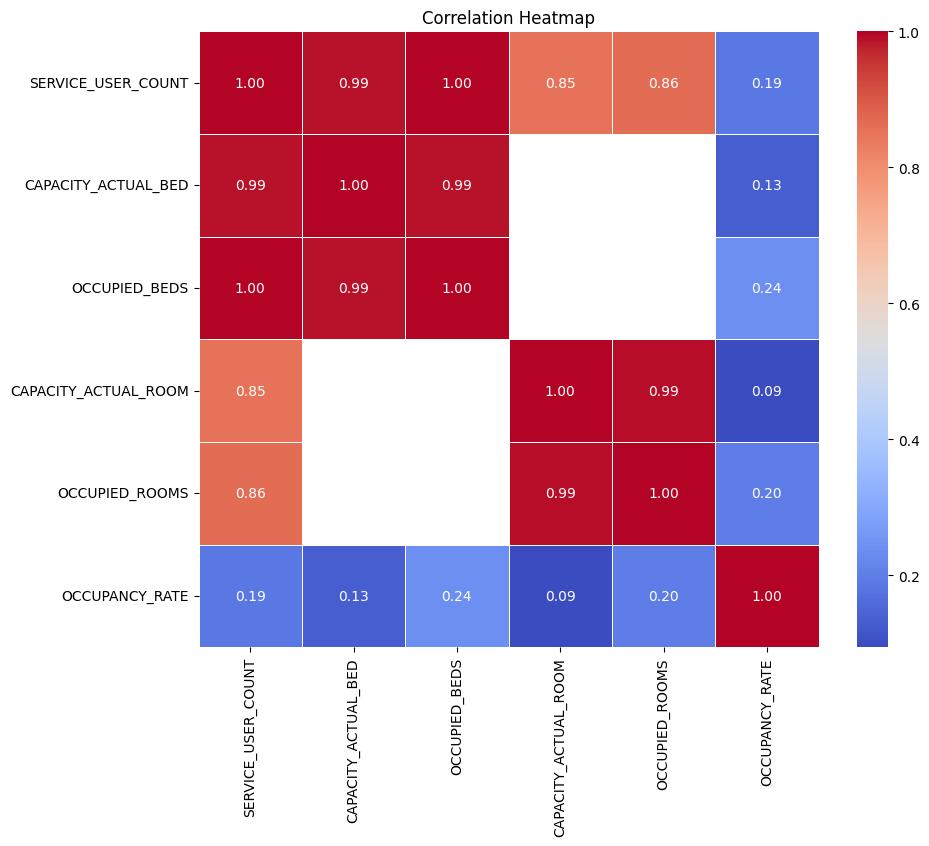

In [ ]:
# Correlation heatmap of selected variables
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

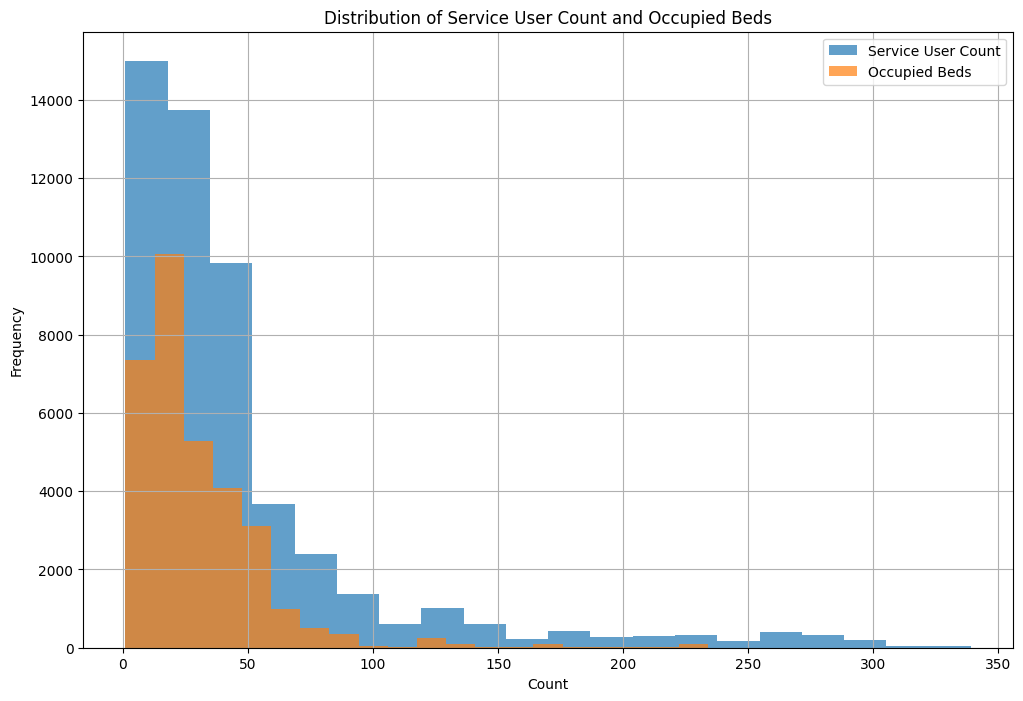

In [ ]:
# Histograms of Service User Count and Occupied Beds
plt.figure(figsize=(12, 8))
df_selected['SERVICE_USER_COUNT'].hist(bins=20, alpha=0.7, label='Service User Count')
df_selected['OCCUPIED_BEDS'].hist(bins=20, alpha=0.7, label='Occupied Beds')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Service User Count and Occupied Beds')
plt.legend()
plt.show()

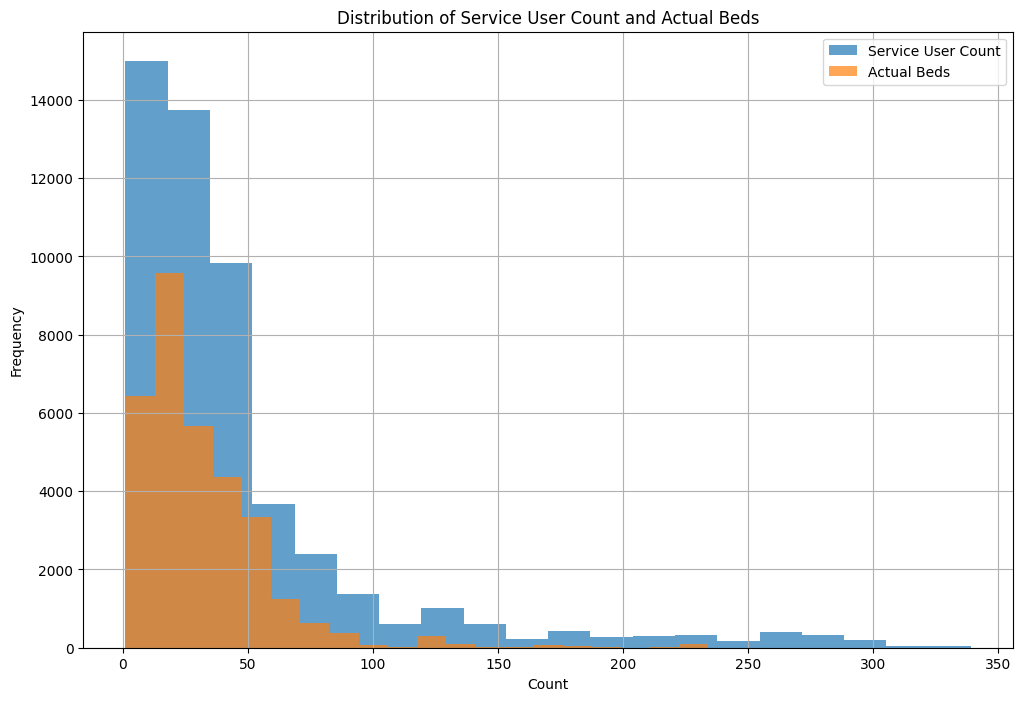

In [ ]:
# Histograms of Service User Count and Actual Beds
plt.figure(figsize=(12, 8))
df_selected['SERVICE_USER_COUNT'].hist(bins=20, alpha=0.7, label='Service User Count')
df_selected['CAPACITY_ACTUAL_BED'].hist(bins=20, alpha=0.7, label='Actual Beds')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Service User Count and Actual Beds')
plt.legend()
plt.show()

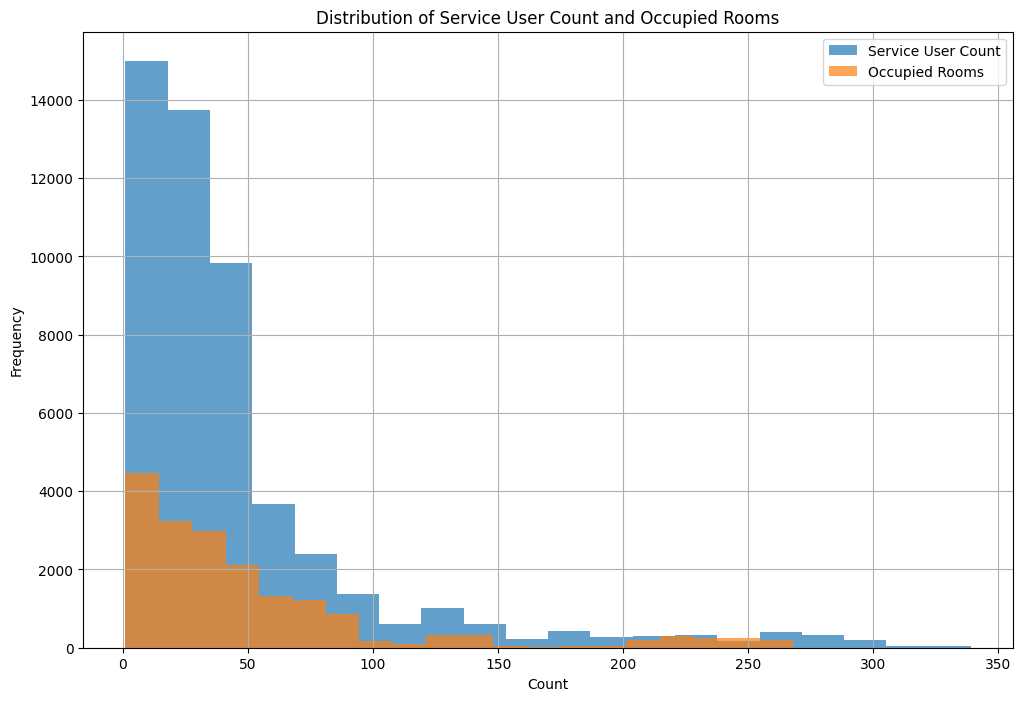

In [ ]:
# Histograms of Service User Count and Actual Rooms
plt.figure(figsize=(12, 8))
df_selected['SERVICE_USER_COUNT'].hist(bins=20, alpha=0.7, label='Service User Count')
df_selected['OCCUPIED_ROOMS'].hist(bins=20, alpha=0.7, label='Occupied Rooms')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Service User Count and Occupied Rooms')
plt.legend()
plt.show()

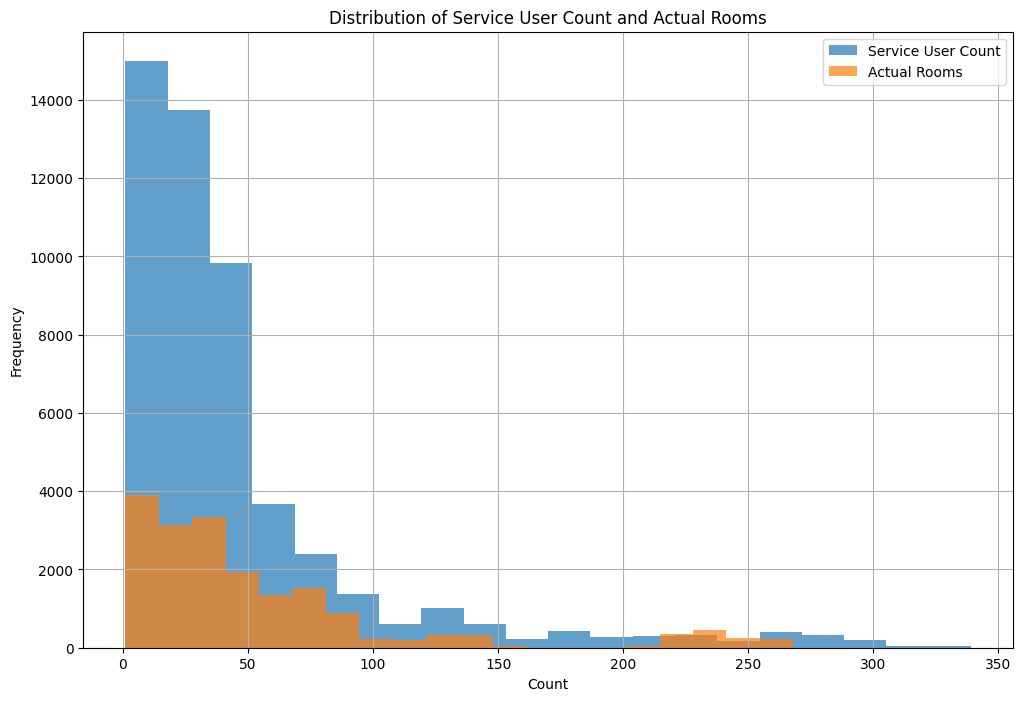

In [ ]:
# Histograms of Service User Count and Actual Rooms
plt.figure(figsize=(12, 8))
df_selected['SERVICE_USER_COUNT'].hist(bins=20, alpha=0.7, label='Service User Count')
df_selected['CAPACITY_ACTUAL_ROOM'].hist(bins=20, alpha=0.7, label='Actual Rooms')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Service User Count and Actual Rooms')
plt.legend()
plt.show()

<ipython-input-17-7d8239a63896>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PROGRAM_MODEL', data=df_selected, palette='viridis')


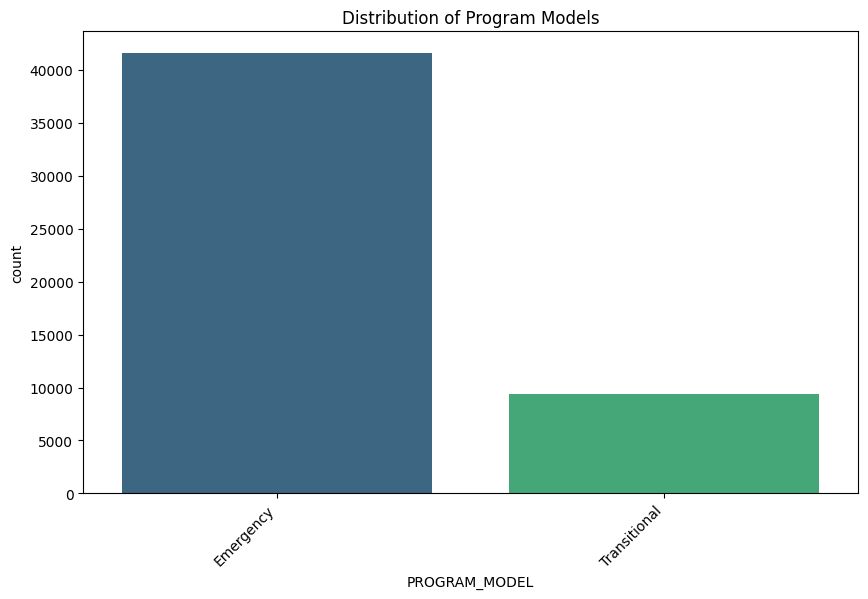

In [ ]:
# Countplot of Program Model
plt.figure(figsize=(10, 6))
sns.countplot(x='PROGRAM_MODEL', data=df_selected, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Program Models')
plt.show()

<ipython-input-54-4d2264fdb44a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CAPACITY_TYPE', data=df_selected, palette='viridis')


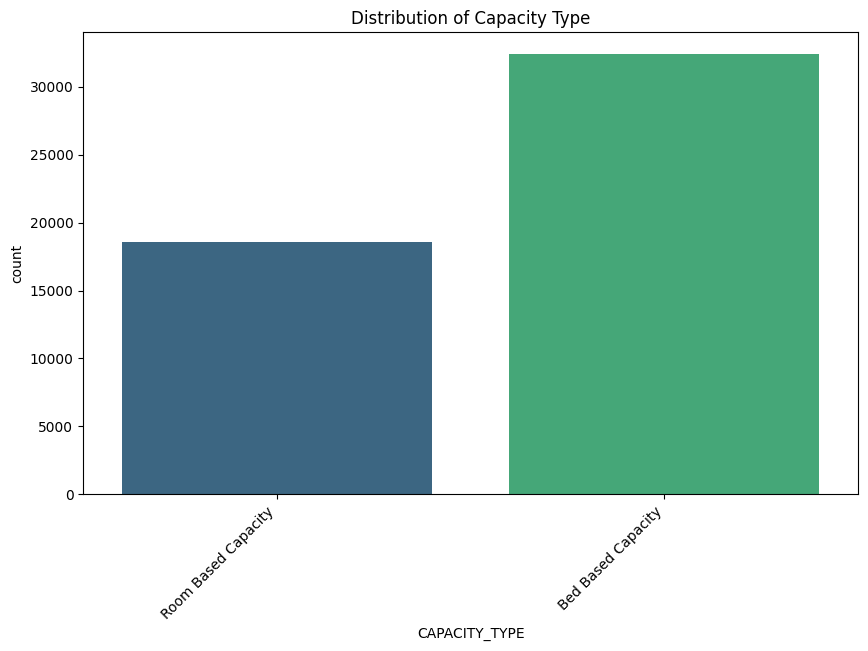

In [ ]:
# Countplot of Capacity Type
plt.figure(figsize=(10, 6))
sns.countplot(x='CAPACITY_TYPE', data=df_selected, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Capacity Type')
plt.show()